In [ ]:
import re

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/datarush/train.csv")
df_valid = pd.read_csv("/content/drive/MyDrive/datarush/validation.csv")
df_test = pd.read_csv("/content/drive/MyDrive/datarush/test.csv")

In [ ]:
df_train.shape

(390603, 4)

In [ ]:
df_train.head()

,id,abstract,category,category_num
0,271675,Bacteria are often exposed to multiple stimu...,q-bio-QM,138
1,412276,Accurate knowledge of the thermodynamic prop...,hep-ph-,68
2,256956,The largest X9.3 solar flare in solar cycle ...,astro-ph-SR,7
3,427612,We say that a random integer variable $X$ is...,math-PR,93
4,113852,We derive a formula expressing the joint dis...,math-CO,76


In [ ]:
print(df_train.shape)
print(df_valid.shape)
train = df_train.append(df_valid)
train.shape


(390603, 4)
(48824, 4)


(439427, 4)

In [ ]:
train.head

<bound method NDFrame.head of            id  ... category_num
0      271675  ...          138
1      412276  ...           68
2      256956  ...            7
3      427612  ...           93
4      113852  ...           76
...       ...  ...          ...
48819  488203  ...           81
48820  488232  ...          120
48821  488240  ...          150
48822  488243  ...          150
48823  488247  ...          150

[439427 rows x 4 columns]>

In [ ]:
df = train.loc[train['category'] == "econ-TH"]


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('english')
stop_words.append('We')
stop_words.append('In')
stop_words.append('The')
stop_words.append('This')

df['abstract'] = df['abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df.abstract

1166     paper introduces dynamic mechanism design elem...
2563     Online platforms collect rich information part...
2841     literature specifies extensive-form games many...
4538     paper considers truncation strategies housing ...
5738     paper attempts analyse policymaking field Inte...
                               ...                        
46924    paper studies general relationship gearing rat...
47293    study wealth distribution UK households detail...
47898    hawk-dove game admits two types equilibria: as...
48214    study model conflict two parties escalates war...
48599    Condorcet Jury Theorem Miracle Aggregation fre...
Name: abstract, Length: 531, dtype: object

In [ ]:
from nltk.util import ngrams


In [ ]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [ ]:
from collections import Counter



In [ ]:

bigrams = documentNgrams(df['abstract'], 2)


In [ ]:
bigrams

,words,count
1140,main result,11
2975,"show that,",13
9326,sufficient condition,13
4747,revealed preference,13
3,mechanism design,15
666,decision maker,15
3201,Our results,15
6602,information structure,15
5084,also show,15
1604,social choice,22


In [ ]:
bigrams =bigrams.drop([2975])

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Count')

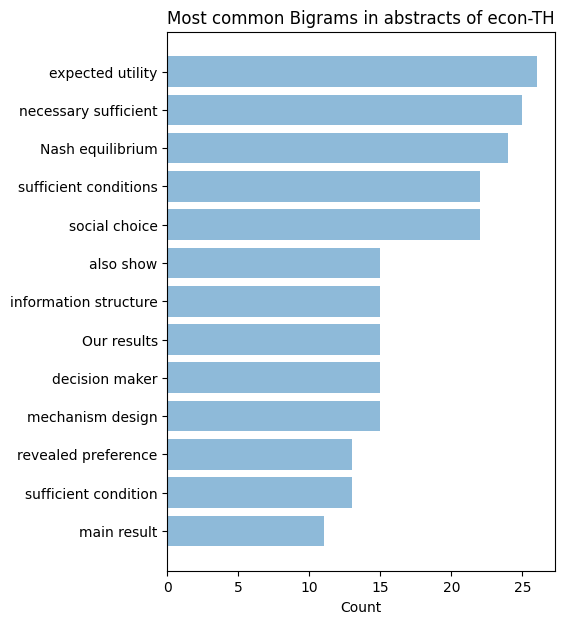

In [ ]:
fig = plt.figure(figsize = (20, 7))
plt.subplots_adjust(wspace=.5)
ax2 = fig.add_subplot(132)
ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
ax2.set_title('Most common Bigrams in abstracts of econ-TH')
plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
plt.xlabel('Count')

In [ ]:
df['abstract'] = df['abstract'].str.lower()
from collections import Counter
coumt = Counter(" ".join(df["abstract"]).split()).most_common(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_words= pd.DataFrame(coumt)
df_words = df_words.reset_index()
df_words = df_words.drop(columns='index')
df_words = df_words.rename(columns={0:'words', 1:'counts'})

df_words

,words,counts
0,the,165235
1,of,105606
2,a,67712
3,and,54753
4,in,51001
...,...,...
95,noise,2189
96,control,2173
97,general,2146
98,key,2140


In [ ]:
words = df_words["words"].to_numpy()
words

array(['the', 'of', 'a', 'and', 'in', 'to', 'quantum', 'we', 'is', 'for',
       'that', 'with', 'by', 'this', 'on', 'an', 'as', 'are', 'be', 'can',
       'which', 'our', 'from', 'state', 'states', 'show', 'it', 'two',
       'between', 'classical', 'using', 'system', 'such', 'these', 'at',
       'also', 'entanglement', 'one', 'or', 'information', 'not',
       'results', 'has', 'based', 'have', 'its', 'systems', 'number',
       'time', 'both', 'model', 'measurement', 'where', 'study', 'their',
       'different', 'present', 'phase', 'when', 'method', 'demonstrate',
       'only', 'new', 'been', 'used', 'optical', 'any', 'find', 'than',
       'single', 'field', 'algorithm', 'dynamics', 'all', 'how', 'more',
       'use', 'into', 'qubit', 'energy', 'propose', 'approach', 'but',
       'experimental', 'spin', 'work', 'photon', 'entangled', 'provide',
       'error', 'here', 'theory', 'problem', 'however,', 'qubits',
       'noise', 'control', 'general', 'key', 'under'], dtype=object)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

output = [w for w in words if not w in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


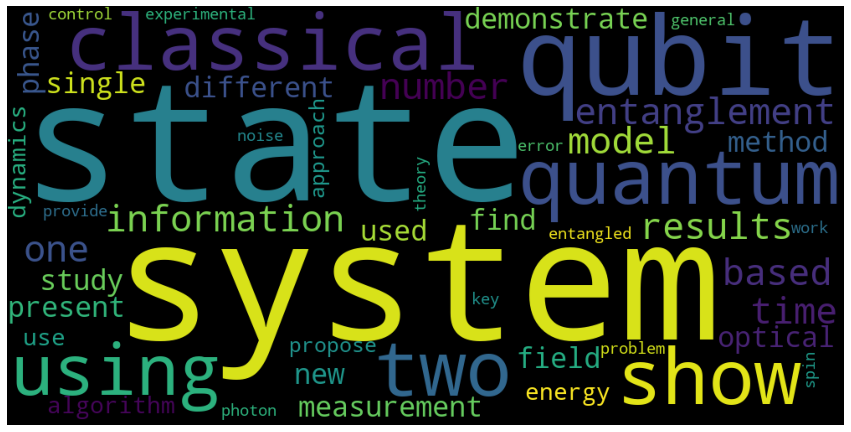

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(output)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("cs-LG"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
df_train.head()

,id,abstract,category,category_num
0,271675,Bacteria are often exposed to multiple stimu...,q-bio-QM,138
1,412276,Accurate knowledge of the thermodynamic prop...,hep-ph-,68
2,256956,The largest X9.3 solar flare in solar cycle ...,astro-ph-SR,7
3,427612,We say that a random integer variable $X$ is...,math-PR,93
4,113852,We derive a formula expressing the joint dis...,math-CO,76


In [ ]:
df_test.head()

,id,abstract
0,430065,Depth maps obtained by commercial depth sens...
1,75226,When lambda expressions were introduced to t...
2,301990,We propose and demonstrate that a gamma-gamm...
3,301001,"In physics labs, students experience a wide ..."
4,280179,The existence of local minima for one-hidden...


In [ ]:
import matplotlib.pyplot as plt


# **Most and least Occuring Categories** / **Imbalance of Data**

In [ ]:
value_counts = train['category'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['category', 'counts']
sorted_df = df_value_counts_reset.sort_values(["counts"], ascending=False)
sorted_df

,category,counts
0,cs-LG,26280
1,cs-CV,25833
2,quant-ph-,16366
3,cs-CL,12538
4,hep-ph-,12191
...,...,...
151,q-fin-EC,19
152,astro-ph-,7
153,q-alg-,2
154,alg-geom-,1


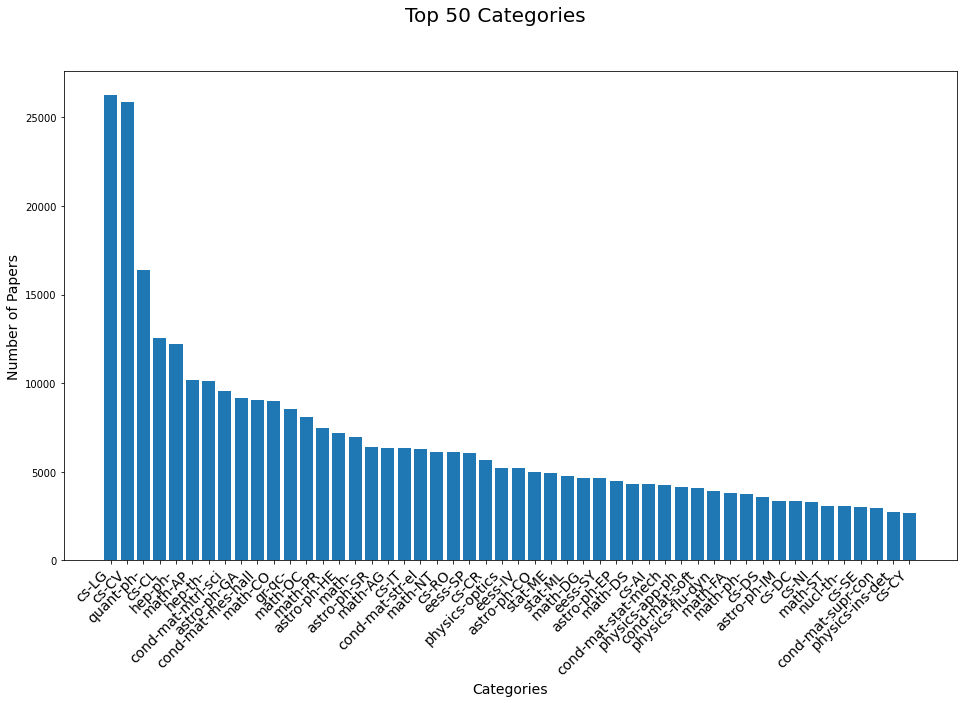

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()
fig.suptitle('Top 50 Categories', fontsize=20)
plt.ylabel('Number of Papers', fontsize=14)
plt.xlabel('Categories', fontsize=14)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45, fontsize=14)
plt.bar(sorted_df['category'][:50],sorted_df['counts'][:50])
plt.show()

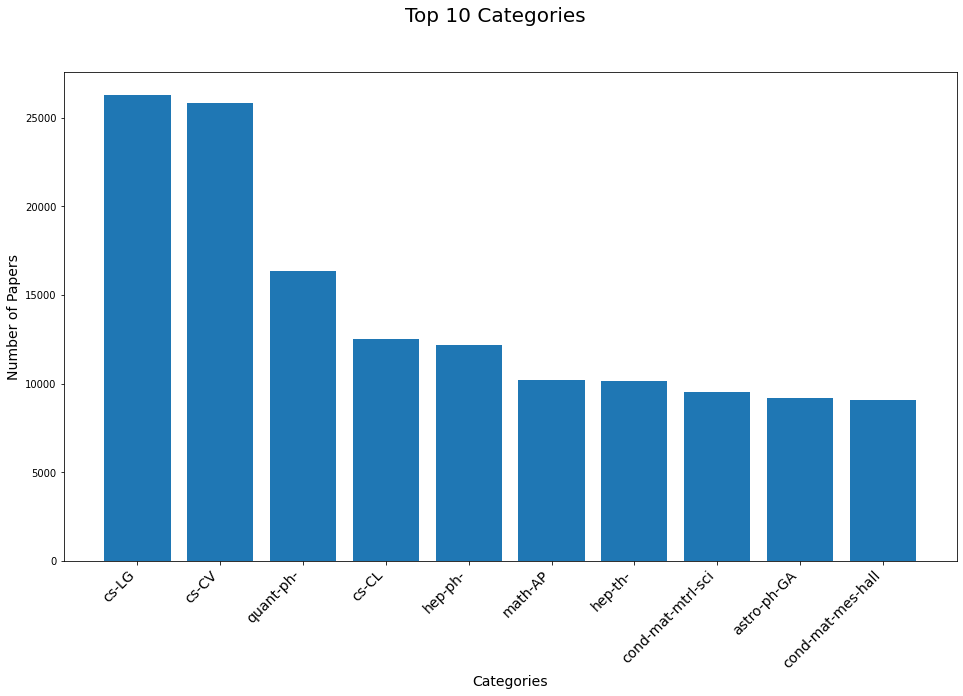

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()
fig.suptitle('Top 10 Categories', fontsize=20)
plt.ylabel('Number of Papers', fontsize=14)
plt.xlabel('Categories', fontsize=14)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45, fontsize=14)
plt.bar(sorted_df['category'][:10],sorted_df['counts'][:10])
plt.show()

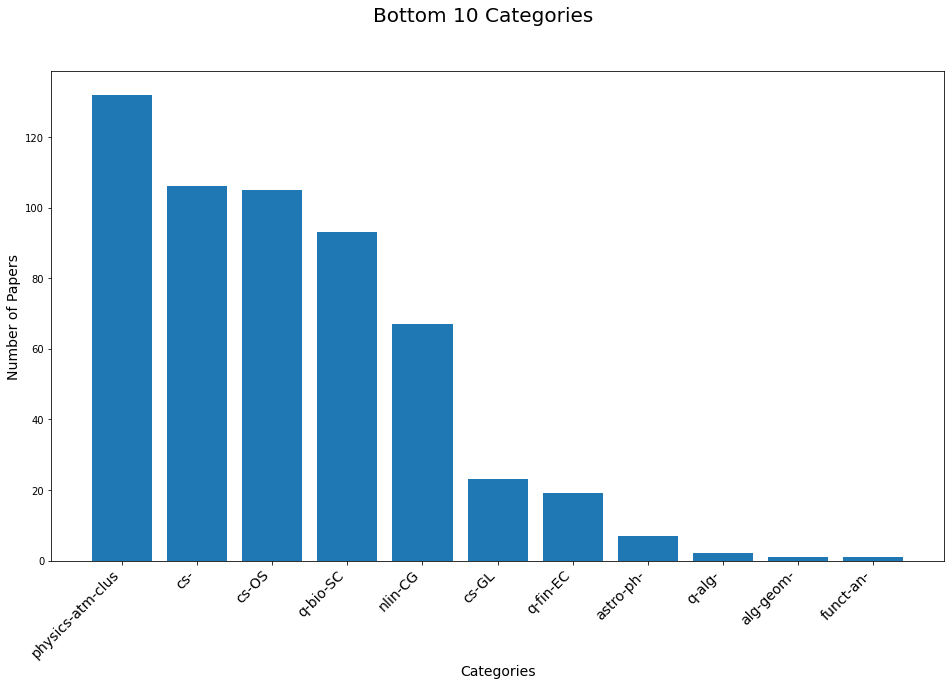

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()
fig.suptitle('Bottom 10 Categories', fontsize=20)
plt.ylabel('Number of Papers', fontsize=14)
plt.xlabel('Categories', fontsize=14)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45, fontsize=14)
plt.bar(sorted_df['category'][145:],sorted_df['counts'][145:])
plt.show()

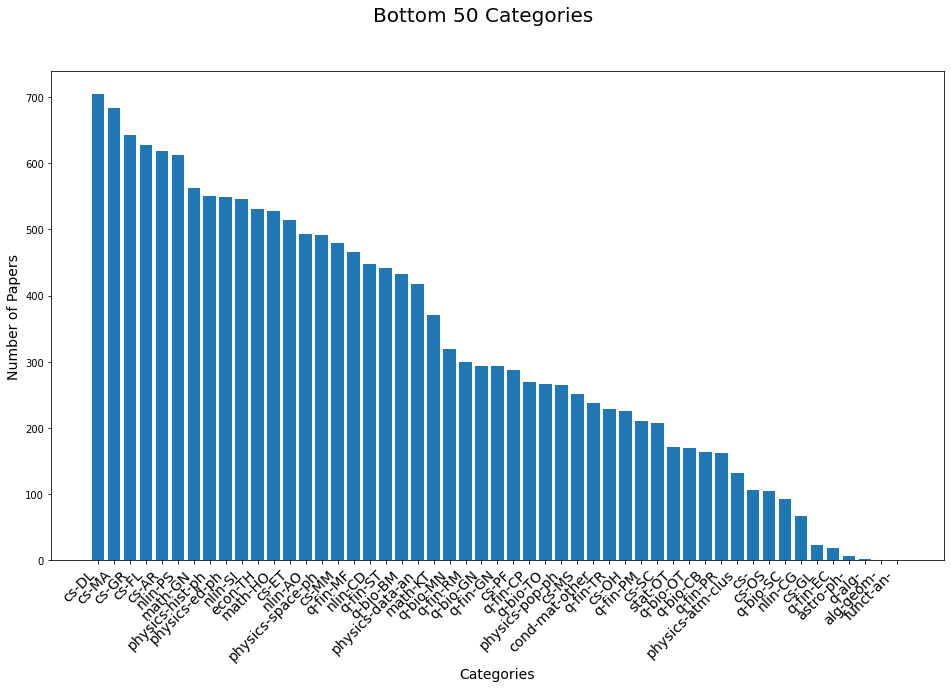

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()
fig.suptitle('Bottom 50 Categories', fontsize=20)
plt.ylabel('Number of Papers', fontsize=14)
plt.xlabel('Categories', fontsize=14)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45, fontsize=14)
plt.bar(sorted_df['category'][105:],sorted_df['counts'][105:])
plt.show()

# **Word Lengths in Abstracts**


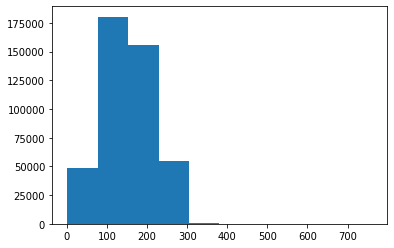

In [ ]:
lengths = [len(t.split()) for t in train['abstract']]
lengths.sort()
plt.hist(lengths)
plt.show()

####**Abstracts with words ranging from 300-400**

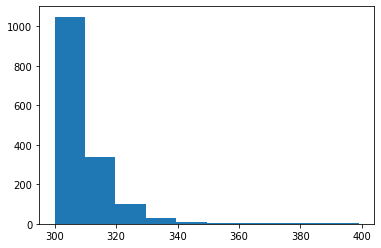

In [ ]:
plt.hist([i for i in lengths if i > 299 and i < 400])
plt.show()

In [ ]:
train['abstract'] = train['abstract'].str.lower()

In [ ]:
from collections import Counter
df = Counter(" ".join(train["abstract"]).split()).most_common(100)

In [ ]:
df_words= pd.DataFrame(df)
df_words = df_words.reset_index()
df_words = df_words.drop(columns='index')
df_words = df_words.rename(columns={0:'words', 1:'counts'})

df_words

,words,counts
0,the,4546818
1,of,2730167
2,and,1791338
3,a,1677525
4,to,1467965
...,...,...
95,under,54770
96,systems,54472
97,function,54011
98,most,53367


In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=8)

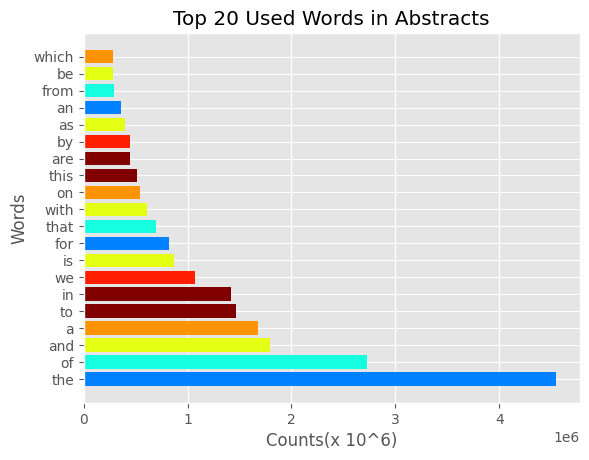

In [ ]:
numbers = [2, 3, 5, 6, 8, 12, 7, 5]
plt.barh(df_words['words'][:20],df_words['counts'][:20],color=my_cmap(my_norm(numbers)))
plt.title('Top 20 Used Words in Abstracts')
plt.ylabel('Words')
plt.xlabel('Counts(x 10^6)')
plt.show()

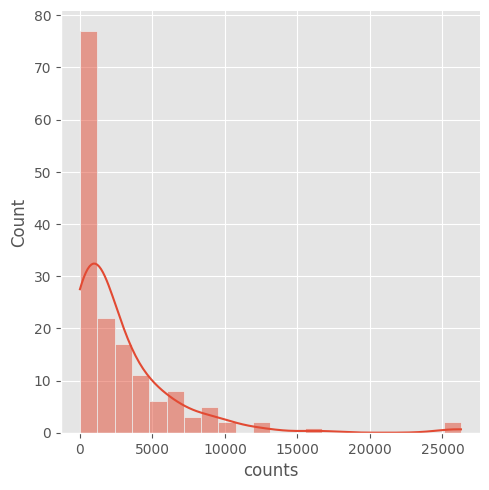

In [ ]:
import seaborn as sns

sns.displot(sorted_df, x="counts",kde=True)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

import spacy
from nltk.stem import PorterStemmer


In [ ]:
ps = PorterStemmer()

In [ ]:
def clean_abstract(text):
  text = re.sub('[^a-z\s]', ' ', text.lower())
  text = [i.lower() for i in text.split() if i not in nlp.Defaults.stop_words]
  text = [ps.stem(i) for i in text]
  text = ' '.join(text)
  text.replace('\n',' ')
  return text

In [ ]:
train['abstract'] = train['abstract'].apply(clean_abstract)

In [ ]:
from collections import Counter
df = Counter(" ".join(train["abstract"]).split()).most_common(100)

In [ ]:
df_words= pd.DataFrame(df)
df_words = df_words.reset_index()
df_words = df_words.drop(columns='index')
df_words = df_words.rename(columns={0:'words', 1:'counts'})

df_words

,words,counts
0,model,382594
1,result,227788
2,method,218159
3,gener,206729
4,system,200956
...,...,...
95,recent,65379
96,type,65335
97,design,65172
98,complex,64791


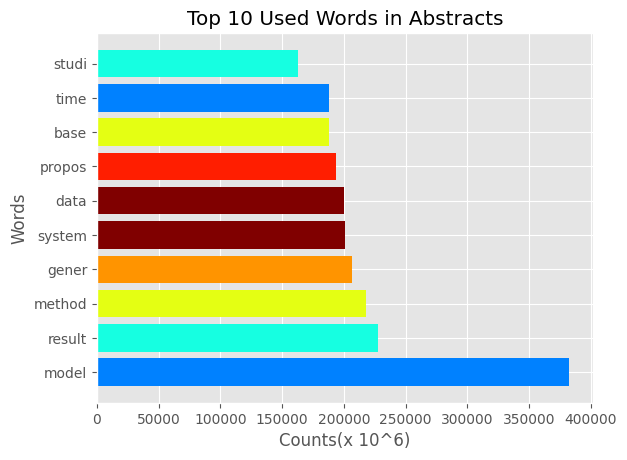

In [ ]:
numbers = [2, 3, 5, 6, 8, 12, 7, 5]
plt.barh(df_words['words'][:10],df_words['counts'][:10],color=my_cmap(my_norm(numbers)))
plt.title('Top 10 Used Words in Abstracts')
plt.ylabel('Words')
plt.xlabel('Counts(x 10^6)')
plt.show()

In [ ]:
from scipy import stats


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GroupKFold, GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KernelDensity, KDTree
from sklearn.metrics import *

from imblearn.over_sampling import SMOTENC,SMOTE

In [ ]:
X_train, y_train = train['abstract'],train['category']
test_data = df_test['abstract']

In [ ]:
y_train = df_train['category_num']

In [ ]:
tfidf = TfidfVectorizer(max_features=30000, stop_words='english', ngram_range=(1,2))

In [ ]:
tfidf_vectorizer = tfidf.fit(X_train)

X_train = tfidf_vectorizer.transform(X_train)

In [ ]:
test_data = tfidf_vectorizer.transform(test_data)

In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('model.csv')

In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df

,index,Regular,Over,Under
0,SVC,0.818860,0.828845,0.815316
1,Naive,0.239385,0.310514,0.265533
2,logreg,0.562472,0.636317,0.599502


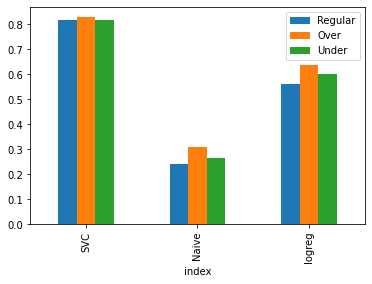

In [ ]:
df.plot(x="index", y=["Regular", "Over", "Under"], kind="bar")


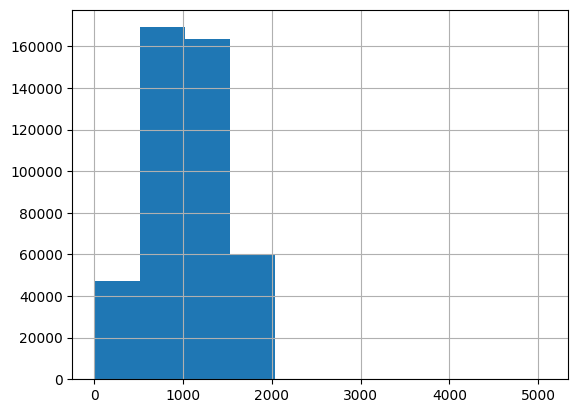

In [ ]:
train['abstract'].str.len().hist()


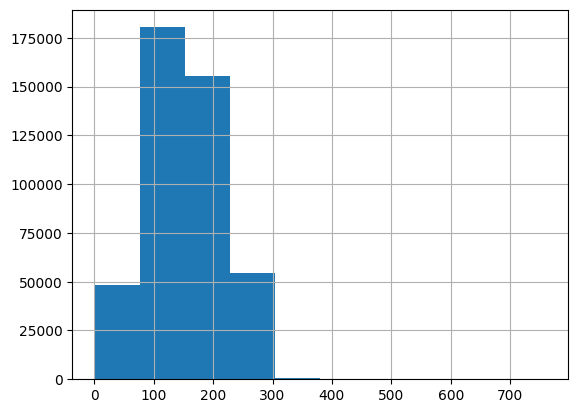

In [ ]:
train['abstract'].str.split().\
    map(lambda x: len(x)).\
    hist()

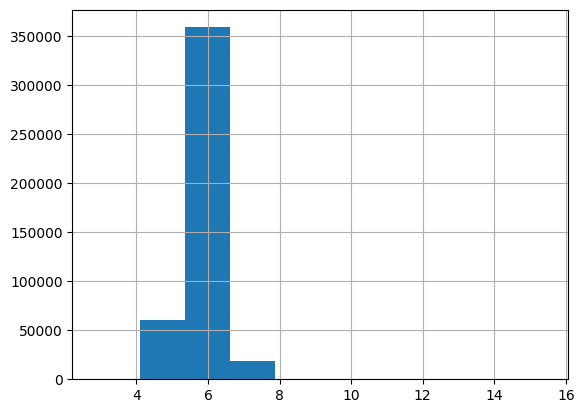

In [ ]:
train['abstract'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop=set(stopwords.words('english'))

In [ ]:

# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

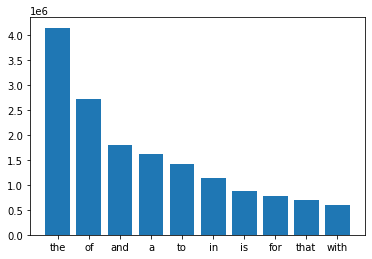

In [ ]:
plot_top_stopwords_barchart(train['abstract'])


In [ ]:
!python -m spacy download en_core_web_sm


     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
!pip install textstat

     |████████████████████████████████| 101 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 33.1 MB/s 


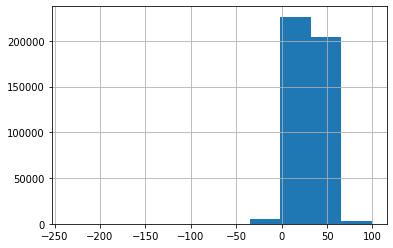

In [ ]:
from textstat import flesch_reading_ease

train['abstract'].\
   apply(lambda x : flesch_reading_ease(x)).hist()